In [11]:
# import library

import pandas as pd
import numpy as np

In [2]:
# Load dataset 

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


In [3]:
# Information of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       440 non-null    object 
 1   CSUSHPISA  440 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


# Qualitative and Quantitative Data Analysis

In [4]:
# View dataset ColumnNames

dataset.columns

Index(['DATE', 'CSUSHPISA'], dtype='object')

In [5]:
# Qualitative and Quantitative Data Analysis
# Qualitative - object
# Quantitative - Numerical

# Function for QualQuan

def qualQuan(dataset):
    qual=[]
    quan=[]
    for columnName in dataset.columns:
        print(columnName)
        if (dataset[columnName].dtypes=='O'):
            print("Qualitative")
            qual.append(columnName)
            
        else:
            print("Quantitative")
            quan.append(columnName)
            
    return qual,quan 

In [6]:
# Calling the QualQuan function

qual,quan=qualQuan(dataset)

DATE
Qualitative
CSUSHPISA
Quantitative


In [7]:
# Qualitative data

qual

['DATE']

In [8]:
# Quantitative data

quan

['CSUSHPISA']

# Measure of Central Tendency
# Mean, Median, Mode

In [9]:
# Function for Mean, Median, Mode

def MeanMedianMode():
    descriptive=pd.DataFrame(index=["Mean","Median","Mode"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    return descriptive

In [10]:
# Call MeanMedianMode

MeanMedianMode()

,CSUSHPISA
Mean,141.526198
Median,140.69
Mode,76.056


# Measure of Location of data
# Percentile

In [12]:
# describe() method gives us summary statistics for numerical columns in our DataFrame.

dataset.describe()

,CSUSHPISA
count,440.000000
mean,141.526198
std,60.725890
min,63.965000
25%,82.133750
50%,140.690000
75%,178.314500
max,309.404000


In [13]:
def Percentile():
    descriptive=pd.DataFrame(index=["Mean", "Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q4:100%"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
        descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
        descriptive[columnName]["Q4:99%"]=np.percentile(dataset[columnName],99)   # np.percentile
        descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]  # as described in dataset.describe for 100%
    return descriptive 

In [14]:
Percentile()

,CSUSHPISA
Mean,141.526198
Median,140.69
Mode,76.056
Q1:25%,82.13375
Q2:50%,140.69
Q3:75%,178.3145
Q4:99%,303.76402
Q4:100%,309.404


# Measure of Location of Data
# Inter Quartile Range
# Potential Outlier

In [19]:
# IQR,Outlier Function

def IQROutlier():
    descriptive=pd.DataFrame(index=["Mean", "Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","LesserOutlier","GreaterOutlier","min values","max values"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]

        descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)   # np.percentile
        descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]  # as described in dataset.describe for 100%

        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["LesserOutlier"]=descriptive[columnName]["Q1:25%"]- descriptive[columnName]["1.5rule"]
        descriptive[columnName]["GreaterOutlier"]=descriptive[columnName]["Q3:75%"]+ descriptive[columnName]["1.5rule"]
        descriptive[columnName]["min values"]=dataset[columnName].min()
        descriptive[columnName]["max values"]=dataset[columnName].max()


    return descriptive  

In [20]:
IQROutlier()

,CSUSHPISA
Mean,141.526198
Median,140.69
Mode,76.056
Q1:25%,82.13375
Q2:50%,140.69
Q3:75%,178.3145
99%,303.76402
Q4:100%,309.404
IQR,96.18075
1.5rule,144.271125


In [21]:
# Potential Outlier Function

def PotentialOutlier(lesser,greater):
    lesser=[]
    greater=[]

    for columnName in quan:
        if descriptive[columnName]["min values"]< descriptive[columnName]["LesserOutlier"]:
            lesser.append(columnName)

        if descriptive[columnName]["max values"]> descriptive[columnName]["GreaterOutlier"]:
            greater.append(columnName)
            
    return lesser,greater

In [23]:
PotentialOutlier(lesser,greater)

([], [])

# No outlier is present in the dataset

# Measure of Location of data
# Frequency
# Relative Frequency
# Cumulative Relative Frequency

In [37]:
#Funtion for frequency Table

def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=["Unique values","Frequency","Relative Frequency","Cumulative RF"])

    freqTable["Unique values"]=dataset[columnName].value_counts().index
    freqTable["Frequency"]=dataset[columnName].value_counts().values
    freqTable["Relative Frequency"]=dataset[columnName].value_counts().values/len(dataset[columnName])*100      
    freqTable["Cumulative RF"]=freqTable["Relative Frequency"].cumsum()
    return freqTable

In [38]:
freqTable("CSUSHPISA",dataset)

,Unique values,Frequency,Relative Frequency,Cumulative RF
0,76.056,2,0.454545,0.454545
1,63.965,1,0.227273,0.681818
2,139.981,1,0.227273,0.909091
3,136.607,1,0.227273,1.136364
4,136.674,1,0.227273,1.363636
...,...,...,...,...
434,93.208,1,0.227273,99.090909
435,92.712,1,0.227273,99.318182
436,92.199,1,0.227273,99.545455
437,91.717,1,0.227273,99.772727


# Skewness 
# Kurtosis

In [27]:
# Skewness and Kurtosis Function

def SkewKurtosis():
    descriptive=pd.DataFrame(index=["Mean", "Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","LesserOutlier","GreaterOutlier","min values","max values","Skewness","Kurtosis"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]

        descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)   # np.percentile
        descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]  # as described in dataset.describe for 100%

        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["LesserOutlier"]=descriptive[columnName]["Q1:25%"]- descriptive[columnName]["1.5rule"]
        descriptive[columnName]["GreaterOutlier"]=descriptive[columnName]["Q3:75%"]+ descriptive[columnName]["1.5rule"]
        descriptive[columnName]["min values"]=dataset[columnName].min()
        descriptive[columnName]["max values"]=dataset[columnName].max()
        
        descriptive[columnName]["Skewness"]=dataset[columnName].skew()
        descriptive[columnName]["Kurtosis"]=dataset[columnName].kurtosis()


    return descriptive  

In [28]:
SkewKurtosis()

,CSUSHPISA
Mean,141.526198
Median,140.69
Mode,76.056
Q1:25%,82.13375
Q2:50%,140.69
Q3:75%,178.3145
99%,303.76402
Q4:100%,309.404
IQR,96.18075
1.5rule,144.271125


# Measure of spread
# Variance
# Standard Deviation

In [29]:
# Variance and Standard Deviation

def Univariate(dataset,quan):
    descriptive=pd.DataFrame(index=["Mean", "Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","LesserOutlier","GreaterOutlier","min values","max values","Skewness","Kurtosis","Variance","SD"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]

        descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)   # np.percentile
        descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]  # as described in dataset.describe for 100%

        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["LesserOutlier"]=descriptive[columnName]["Q1:25%"]- descriptive[columnName]["1.5rule"]
        descriptive[columnName]["GreaterOutlier"]=descriptive[columnName]["Q3:75%"]+ descriptive[columnName]["1.5rule"]
        descriptive[columnName]["min values"]=dataset[columnName].min()
        descriptive[columnName]["max values"]=dataset[columnName].max()
        
        descriptive[columnName]["Skewness"]=dataset[columnName].skew()
        descriptive[columnName]["Kurtosis"]=dataset[columnName].kurtosis()

        descriptive[columnName]["Variance"]=dataset[columnName].var()
        descriptive[columnName]["SD"]=dataset[columnName].std()

    return descriptive  

In [30]:
Univariate(dataset,quan)

,CSUSHPISA
Mean,141.526198
Median,140.69
Mode,76.056
Q1:25%,82.13375
Q2:50%,140.69
Q3:75%,178.3145
99%,303.76402
Q4:100%,309.404
IQR,96.18075
1.5rule,144.271125


# Probability Density Function
# Normal Distribution

In [31]:

# seaborn -  data visualization library

import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\2460610442.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CSUSHPISA"])
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

<Axes: xlabel='CSUSHPISA', ylabel='Density'>

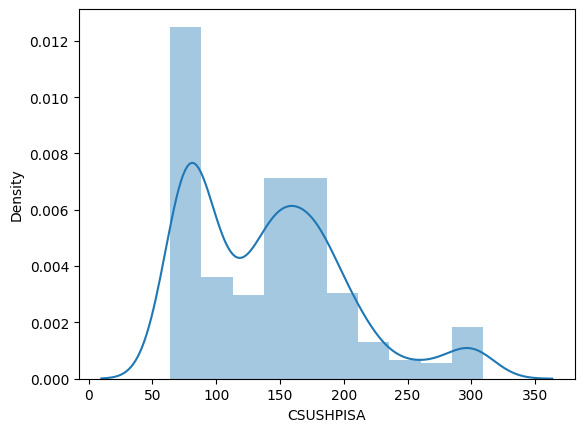

In [32]:
# distplot - distribution plot
# distplot visualizes through histogram
# distplot - y axis - Probability Density Function

# The  histogram represents Probability Density Function of Normal Distribution

sns.distplot(dataset["CSUSHPISA"])

F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


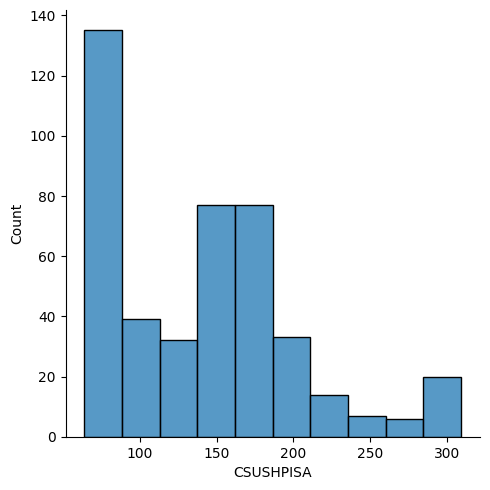

In [33]:
# displot() - y aixs -  count

sns.displot(dataset["CSUSHPISA"])

# Probability Density Function

In [34]:
# Probability Density Function

def get_pdf_probability(dataset,startrange,endrange):
    
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    
    # kde - kernel density estimate
    # axvline - Add a vertical line across the Axes.
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    
    # generate a sample
    sample = dataset
    # calculate mean, SD
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    # Normal Distribution of mean and SD - norm(mean,SD)
    dist = norm(sample_mean, sample_std)
    
    # one line for loop
    # sample probabilities for a range of outcomes
    # Probability density function pdf()
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=141.526, Standard Deviation=60.726
The area between range(100,200):0.5856868572708113


C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\2350304627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

0.5856868572708113

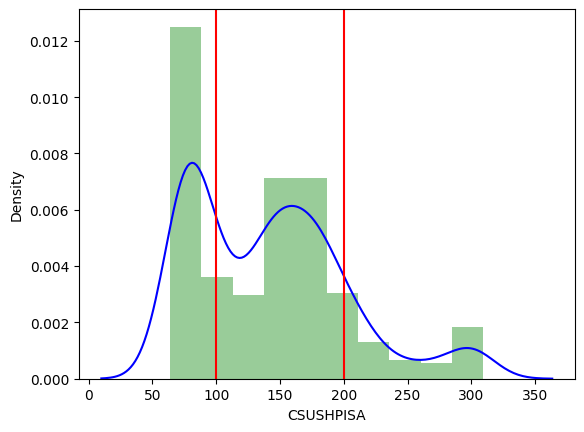

In [35]:
get_pdf_probability(dataset["CSUSHPISA"],100,200)

# Cumulative Density Function

In [36]:
# Cumulative Density Function

# statsmodels is a Python module
# ECDF - "Empirical Cumulative Distribution Function"

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['CSUSHPISA'])
ecdf(150) # Cumulative Density Function


0.5886363636363636